<a href="https://colab.research.google.com/github/Vatsalya-SLUHDS/svmadhurapantula-portfolio.github.io/blob/main/Exploratory_Data_Analysis/gastric-cancer-biomarker-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HDS5210-FINAL PROJECT**
**Gastric Cancer** is the topic taken for this final project.
Two datasets are selected from different sources.

**Links for the datasets**:

Dataset 1 (gastric_cancer): https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/AC79EP

Dataset 2 (incidence_mo): https://statecancerprofiles.cancer.gov/incidencerates/index.php?stateFIPS=29&areatype=county&age=001&cancer=018&stage=999&race=00&sex=0&year=0&type=incd&sortVariableName=count&sortOrder=desc

These two datasets are in two different formats (excel and csv).

This topic is choosen with an intention of identifying biomarker for the disease and find associations between various factors related to the disease.

#**1. IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#**2. LOADING AND ACCESSING DATA**

In [ ]:
gastric_cancer = pd.read_excel('/content/drive/MyDrive/Gastric cancer datasets/Gastric cancer Harvard.xlsx')

In [ ]:
gastric_cancer.head()

,Number,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,...,RBC,NEU,LYM,MNC,HCT,MCV,MCH,MCHC,CV,PLT
0,1,2,52,94,65,19.628265,0,0,0,0,...,4.78,0.464,0.402,0.117,0.369,85.2,29.1,341.0,12.5,185.0
1,2,1,67,128,65,23.661439,1,1,0,0,...,6.33,0.585,0.232,0.071,0.313,73.5,22.1,300.0,21.4,201.0
2,3,1,68,142,90,24.212293,0,0,0,0,...,6.76,0.496,0.327,0.062,0.413,86.8,30.5,351.0,12.7,273.0
3,4,1,73,130,73,21.224490,1,1,0,0,...,5.67,0.489,0.377,0.086,0.367,93.6,33.7,360.0,11.2,213.0
4,5,1,68,123,87,24.618104,0,1,0,0,...,4.53,0.623,0.267,0.086,0.412,92.6,33.3,359.0,11.5,218.0


In [ ]:
gastric_cancer.shape

(59, 67)

In [ ]:
gastric_cancer.columns

Index(['Number', 'Gender', 'Age', 'Systolic pressure', 'Diastolic pressure',
       'BMI', 'Smoking history', 'Drinking history', 'heredity', 'Syn',
       'Survival time（month）', 'Whether alive', 'Borrmann',
       'Pathogenic site（1：cardia ，2：lesser curvature，3：greater curvature\n，4：pylorus）',
       'Differentiated degree\n（1：high-medium，2：medium-low，3：Low-signet-ring，0：others）',
       'Lauren', 'TNM', 'T', 'N', 'M', 'Number of tumors',
       'Tumor size（1：＜3cm，2：≥3cm）', 'ALT', 'AST', 'TP', 'ALB', 'TB', 'DB',
       'ALP', 'GGT', 'GLU', 'BUN', 'Cr', 'Ua', 'CK', 'LDH', 'Ca', 'P', 'Mg',
       'K', 'Na', 'Cl', 'CO2', 'CEA', 'AFP', 'Ca125', 'Ca19-9', 'Ca15-3',
       'Ca724', 'CYFRA21-1', 'NSE', 'SCC', 'PGⅠ', 'PGⅡ', 'PGⅠ/Ⅱ', 'HB', 'WBC',
       'RBC', 'NEU', 'LYM', 'MNC', 'HCT', 'MCV', 'MCH', 'MCHC', 'CV', 'PLT'],
      dtype='object')

In [ ]:
gastric_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 67 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Number                                                                         59 non-null     int64  
 1   Gender                                                                         59 non-null     int64  
 2   Age                                                                            59 non-null     int64  
 3   Systolic pressure                                                              59 non-null     int64  
 4   Diastolic pressure                                                             59 non-null     int64  
 5   BMI                                                                            59 non-null     float64
 6   Smoking history             

In [ ]:
print(gastric_cancer)

    Number  Gender  Age  Systolic pressure  Diastolic pressure        BMI  \
0        1       2   52                 94                  65  19.628265   
1        2       1   67                128                  65  23.661439   
2        3       1   68                142                  90  24.212293   
3        4       1   73                130                  73  21.224490   
4        5       1   68                123                  87  24.618104   
5        6       1   63                114                  72  24.056935   
6        7       2   65                136                  78  29.968783   
7        8       2   69                168                  78  24.835763   
8        9       1   52                128                  78  25.864512   
9       10       1   73                167                  99  19.774202   
10      11       1   56                167                  98  24.696539   
11      12       1   43                132                  86  24.419279   

In [ ]:
gastric_cancer.isnull()

,Number,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,...,RBC,NEU,LYM,MNC,HCT,MCV,MCH,MCHC,CV,PLT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#**3. DATA CLEANING AND TRANSFORMATION**


**A. DROPPING UNNECESSARY COLUMNS**

Redundant staging columns like T, N, M are removed since a composite stage (TNM) is provided.

In [ ]:
gastric_cancer.drop('Number', axis = 1, inplace= True)

In [ ]:
gastric_cancer.columns

Index(['Gender', 'Age', 'Systolic pressure', 'Diastolic pressure', 'BMI',
       'Smoking history', 'Drinking history', 'heredity', 'Syn',
       'Survival time（month）', 'Whether alive', 'Borrmann',
       'Pathogenic site（1：cardia ，2：lesser curvature，3：greater curvature\n，4：pylorus）',
       'Differentiated degree\n（1：high-medium，2：medium-low，3：Low-signet-ring，0：others）',
       'Lauren', 'TNM', 'T', 'N', 'M', 'Number of tumors',
       'Tumor size（1：＜3cm，2：≥3cm）', 'ALT', 'AST', 'TP', 'ALB', 'TB', 'DB',
       'ALP', 'GGT', 'GLU', 'BUN', 'Cr', 'Ua', 'CK', 'LDH', 'Ca', 'P', 'Mg',
       'K', 'Na', 'Cl', 'CO2', 'CEA', 'AFP', 'Ca125', 'Ca19-9', 'Ca15-3',
       'Ca724', 'CYFRA21-1', 'NSE', 'SCC', 'PGⅠ', 'PGⅡ', 'PGⅠ/Ⅱ', 'HB', 'WBC',
       'RBC', 'NEU', 'LYM', 'MNC', 'HCT', 'MCV', 'MCH', 'MCHC', 'CV', 'PLT'],
      dtype='object')

In [ ]:
gastric_cancer.drop('T', axis = 1, inplace = True)

In [ ]:
gastric_cancer.drop('N', axis = 1, inplace = True)

In [ ]:
gastric_cancer.drop('M', axis = 1, inplace= True)

In [ ]:
gastric_cancer.columns

Index(['Gender', 'Age', 'Systolic pressure', 'Diastolic pressure', 'BMI',
       'Smoking history', 'Drinking history', 'heredity', 'Syn',
       'Survival time（month）', 'Whether alive', 'Borrmann',
       'Pathogenic site（1：cardia ，2：lesser curvature，3：greater curvature\n，4：pylorus）',
       'Differentiated degree\n（1：high-medium，2：medium-low，3：Low-signet-ring，0：others）',
       'Lauren', 'TNM', 'Number of tumors', 'Tumor size（1：＜3cm，2：≥3cm）', 'ALT',
       'AST', 'TP', 'ALB', 'TB', 'DB', 'ALP', 'GGT', 'GLU', 'BUN', 'Cr', 'Ua',
       'CK', 'LDH', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CO2', 'CEA', 'AFP',
       'Ca125', 'Ca19-9', 'Ca15-3', 'Ca724', 'CYFRA21-1', 'NSE', 'SCC', 'PGⅠ',
       'PGⅡ', 'PGⅠ/Ⅱ', 'HB', 'WBC', 'RBC', 'NEU', 'LYM', 'MNC', 'HCT', 'MCV',
       'MCH', 'MCHC', 'CV', 'PLT'],
      dtype='object')

In [ ]:
gastric_cancer.shape

(59, 63)

**B. HANDLING MISSING VALUES**

All the missing values in the first dataset were identified and then replaced with mean values.

In [ ]:
missing_values_gc = gastric_cancer.isnull().sum()
print(missing_values_gc)

Gender                0
Age                   0
Systolic pressure     0
Diastolic pressure    0
BMI                   0
                     ..
MCV                   1
MCH                   1
MCHC                  1
CV                    1
PLT                   1
Length: 63, dtype: int64


In [ ]:
mean_gc_mcv = gastric_cancer['MCV'].mean()
gastric_cancer['MCV'].fillna(mean_gc_mcv, inplace = True)
mean_gc_mch = gastric_cancer['MCH'].mean()
gastric_cancer['MCH'].fillna(mean_gc_mch, inplace = True)
mean_gc_mchc = gastric_cancer['MCHC'].mean()
gastric_cancer['MCHC'].fillna(mean_gc_mchc,inplace = True )
mean_gc_cv = gastric_cancer['CV'].mean()
gastric_cancer['CV'].fillna(mean_gc_cv, inplace =  True)
mean_gc_plt = gastric_cancer['PLT'].mean()
gastric_cancer.fillna(mean_gc_plt, inplace= True)

In [ ]:
missing_values_gc = gastric_cancer.isnull().sum()
print(missing_values_gc)

Gender                0
Age                   0
Systolic pressure     0
Diastolic pressure    0
BMI                   0
                     ..
MCV                   0
MCH                   0
MCHC                  0
CV                    0
PLT                   0
Length: 63, dtype: int64


**C. CREATING NEW COLUMNS**

Creating new columns named 'Diabetes' AND 'Anemia' based on the existing data.

* Diabetes column is created by selecting two variables in the dataset 'GLU' and 'Diastolic pressure'. If the glucose value ("GLU") is more than the value 125 and if the diastolic blood pressure is more than 80, all those cases will be taken as true for diabetes, else false.

* Anemia column is created in the same way by taking hemoglobin values ("HB"). If "HB" value is less than 12, those will be taken as anemic patients.

* Anemia is an important factor for gastric cancer prognosis.

In [ ]:
col_db = pd.DataFrame({
    'Diabetes': (gastric_cancer['GLU'] > 125) | (gastric_cancer['Diastolic pressure'] > 80)
})

In [ ]:
col_anemia = pd.DataFrame({
    'Anemia': gastric_cancer['HB'] < 12
})

**D. MERGING DATA**

Merging these new columns 'Diabetes'and 'Anemia'to the main dataset 'gastric_cancer'.



In [ ]:
gastric_cancer = gastric_cancer.merge(col_db, how='left', left_index=True, right_index=True)
gastric_cancer = gastric_cancer.merge(col_anemia, how='left', left_index=True, right_index=True)

In [ ]:
gastric_cancer.head()

,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,Survival time（month）,...,LYM,MNC,HCT,MCV,MCH,MCHC,CV,PLT,Diabetes,Anemia
0,2,52,94,65,19.628265,0,0,0,0,21,...,0.402,0.117,0.369,85.2,29.1,341.0,12.5,185.0,False,False
1,1,67,128,65,23.661439,1,1,0,0,8,...,0.232,0.071,0.313,73.5,22.1,300.0,21.4,201.0,False,False
2,1,68,142,90,24.212293,0,0,0,0,13,...,0.327,0.062,0.413,86.8,30.5,351.0,12.7,273.0,True,False
3,1,73,130,73,21.224490,1,1,0,0,14,...,0.377,0.086,0.367,93.6,33.7,360.0,11.2,213.0,False,False
4,1,68,123,87,24.618104,0,1,0,0,13,...,0.267,0.086,0.412,92.6,33.3,359.0,11.5,218.0,True,False


**E. CONVERTING DATA TYPES**

Converting boolean values to numeric values for the columns 'Diabetes' and 'Anemia'.

In [ ]:
gastric_cancer['Diabetes'] = gastric_cancer['Diabetes'].astype(int)

In [ ]:
gastric_cancer['Anemia'] = gastric_cancer['Anemia'].astype(int)

In [ ]:
gastric_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 65 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Gender                                                                         59 non-null     int64  
 1   Age                                                                            59 non-null     int64  
 2   Systolic pressure                                                              59 non-null     int64  
 3   Diastolic pressure                                                             59 non-null     int64  
 4   BMI                                                                            59 non-null     float64
 5   Smoking history                                                                59 non-null     int64  
 6   Drinking history            

In [ ]:
gastric_cancer.columns

Index(['Gender', 'Age', 'Systolic pressure', 'Diastolic pressure', 'BMI',
       'Smoking history', 'Drinking history', 'heredity', 'Syn',
       'Survival time（month）', 'Whether alive', 'Borrmann',
       'Pathogenic site（1：cardia ，2：lesser curvature，3：greater curvature\n，4：pylorus）',
       'Differentiated degree\n（1：high-medium，2：medium-low，3：Low-signet-ring，0：others）',
       'Lauren', 'TNM', 'Number of tumors', 'Tumor size（1：＜3cm，2：≥3cm）', 'ALT',
       'AST', 'TP', 'ALB', 'TB', 'DB', 'ALP', 'GGT', 'GLU', 'BUN', 'Cr', 'Ua',
       'CK', 'LDH', 'Ca', 'P', 'Mg', 'K', 'Na', 'Cl', 'CO2', 'CEA', 'AFP',
       'Ca125', 'Ca19-9', 'Ca15-3', 'Ca724', 'CYFRA21-1', 'NSE', 'SCC', 'PGⅠ',
       'PGⅡ', 'PGⅠ/Ⅱ', 'HB', 'WBC', 'RBC', 'NEU', 'LYM', 'MNC', 'HCT', 'MCV',
       'MCH', 'MCHC', 'CV', 'PLT', 'Diabetes', 'Anemia'],
      dtype='object')

#**DATASET 2- STOMACH CANCER INCIDENCE RATES IN MISSOURI**

#**1.LOADING AND ACCESSING THE DATA**

In [ ]:
incidence_mo = pd.read_csv('/content/drive/MyDrive/Gastric cancer datasets/incd.csv')

In [ ]:
incidence_mo.columns

Index(['County', ' FIPS',
       'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'CI*Rank([rank note])', 'Lower CI (CI*Rank)', 'Upper CI (CI*Rank)',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend ([trend note]) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [ ]:
incidence_mo.head()

,County,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Missouri(6),29000.0,5.3,5,5.5,N/A,28,43,405,stable,0.3,-2.8,3.3
1,US (SEER+NPCR)(1),0.0,6.2,6.2,6.3,N/A,N/A,N/A,23883,falling,-1,-1.7,-0.7
2,St. Louis County(6),29189.0,5.3,4.8,6,15,6,18,71,stable,-0.1,-1.3,1.2
3,Jackson County(6),29095.0,6.4,5.6,7.2,6,1,14,51,stable,-0.9,-2.3,0.7
4,St. Charles County(6),29183.0,5.6,4.6,6.6,12,3,18,26,stable,1,-1.2,3.9


In [ ]:
incidence_mo.columns

Index(['County', ' FIPS',
       'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'CI*Rank([rank note])', 'Lower CI (CI*Rank)', 'Upper CI (CI*Rank)',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend ([trend note]) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

#**2. DATA TRANSFORMATION**
The following columns were dropped from the dataframe as they do not provide much insight for data analysis.

**A. DROPPING COLUMNS**

In [ ]:
incidence_mo.drop(' FIPS', axis = 1, inplace = True)

In [ ]:
incidence_mo.drop('Recent Trend', axis = 1, inplace = True)

In [ ]:
incidence_mo.drop('CI*Rank([rank note])', axis =1, inplace = True)

In [ ]:
incidence_mo.drop('Lower CI (CI*Rank)', axis = 1, inplace = True)

In [ ]:
incidence_mo.drop('Upper CI (CI*Rank)', axis = 1, inplace = True)

In [ ]:
incidence_mo.drop('Lower 95% Confidence Interval.1', axis = 1, inplace = True)

In [ ]:
incidence_mo.drop('Upper 95% Confidence Interval.1', axis = 1, inplace = True)

In [ ]:
incidence_mo.columns

Index(['County',
       'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count',
       'Recent 5-Year Trend ([trend note]) in Incidence Rates'],
      dtype='object')

**B. DATA CONVERSION**

The data in the dataframe is the object type of data.
This step converts all the object type of data to numeric type (float).

In [ ]:
float_columns = [
    'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000',
    'Lower 95% Confidence Interval',
    'Upper 95% Confidence Interval',
    'Average Annual Count',
    'Recent 5-Year Trend ([trend note]) in Incidence Rates'
]

incidence_mo[float_columns] = incidence_mo[float_columns].apply(pd.to_numeric, errors='coerce')
incidence_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        135 non-null    object 
 1   Age-Adjusted Incidence Rate([rate note]) - cases per 100,000  24 non-null     float64
 2   Lower 95% Confidence Interval                                 24 non-null     float64
 3   Upper 95% Confidence Interval                                 24 non-null     float64
 4   Average Annual Count                                          24 non-null     float64
 5   Recent 5-Year Trend ([trend note]) in Incidence Rates         16 non-null     float64
dtypes: float64(5), object(1)
memory usage: 7.0+ KB


**C. RENAMING COLUMNS**

In [ ]:
incidence_mo = incidence_mo.rename(columns={
  'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000' : 'Age_Adjusted_Incidence_Rate_per_100,000',
  'Lower 95% Confidence Interval' : 'Lower_95_Confidence Interval',
  'Upper 95% Confidence Interval' : 'Upper_95_Confidence_Interval',
  'Average Annual Count' : 'Average_Annual_Count',
  'Recent 5-Year Trend ([trend note]) in Incidence Rates' : 'Recent_5Yr_Trend_Incidence_Rates'
})
incidence_mo.columns

Index(['County', 'Age_Adjusted_Incidence_Rate_per_100,000',
       'Lower_95_Confidence Interval', 'Upper_95_Confidence_Interval',
       'Average_Annual_Count', 'Recent_5Yr_Trend_Incidence_Rates'],
      dtype='object')

**D. HANDLING MISSING VALUES**

The missing values in the second dataset 'incidence_mo' are identified and are replace with mean values.

In [ ]:
missing_values_incd = incidence_mo.isnull().sum()
print(missing_values_incd)

County                                      11
Age_Adjusted_Incidence_Rate_per_100,000    122
Lower_95_Confidence Interval               122
Upper_95_Confidence_Interval               122
Average_Annual_Count                       122
Recent_5Yr_Trend_Incidence_Rates           130
dtype: int64


In [ ]:
incidence_mo['County'].fillna('MISSING', inplace = True)

mean_incd_AAIR = incidence_mo['Age_Adjusted_Incidence_Rate_per_100,000'].mean()
incidence_mo['Age_Adjusted_Incidence_Rate_per_100,000'].fillna(mean_incd_AAIR, inplace = True)

mean_incd_LCI = incidence_mo['Lower_95_Confidence Interval'].mean()
incidence_mo['Lower_95_Confidence Interval'].fillna(mean_incd_LCI, inplace = True)

mean_incd_UCI = incidence_mo['Upper_95_Confidence_Interval'].mean()
incidence_mo['Upper_95_Confidence_Interval'].fillna(mean_incd_UCI, inplace = True)

mean_incd_AAC = incidence_mo['Average_Annual_Count'].mean()
incidence_mo['Average_Annual_Count'].fillna(mean_incd_AAC, inplace = True)

mean_incd_rct_5y = incidence_mo['Recent_5Yr_Trend_Incidence_Rates'].mean()
incidence_mo['Recent_5Yr_Trend_Incidence_Rates'].fillna(mean_incd_rct_5y, inplace = True)

In [ ]:
missing_values_incd = incidence_mo.isnull().sum()
print(missing_values_incd)

County                                     0
Age_Adjusted_Incidence_Rate_per_100,000    0
Lower_95_Confidence Interval               0
Upper_95_Confidence_Interval               0
Average_Annual_Count                       0
Recent_5Yr_Trend_Incidence_Rates           0
dtype: int64


In [ ]:
incidence_mo.drop(incidence_mo[incidence_mo['County'] == 'MISSING'].index, inplace=True)

In [ ]:
incidence_mo = incidence_mo[incidence_mo['County'] != 'MISSING']

In [ ]:
incidence_mo

,County,"Age_Adjusted_Incidence_Rate_per_100,000",Lower_95_Confidence Interval,Upper_95_Confidence_Interval,Average_Annual_Count,Recent_5Yr_Trend_Incidence_Rates
0,Missouri(6),5.300000,5.000000,5.500000,405.000,0.300
1,US (SEER+NPCR)(1),6.200000,6.200000,6.300000,23883.000,-1.000
2,St. Louis County(6),5.300000,4.800000,6.000000,71.000,-0.100
3,Jackson County(6),6.400000,5.600000,7.200000,51.000,-0.900
4,St. Charles County(6),5.600000,4.600000,6.600000,26.000,1.000
...,...,...,...,...,...,...
138,6 Source: National Program of Cancer Registrie...,5.533333,3.954167,7.720833,1024.125,1.325
139,8 Source: Incidence data provided by the SEER ...,5.533333,3.954167,7.720833,1024.125,1.325
142,Interpret Rankings provides insight into inter...,5.533333,3.954167,7.720833,1024.125,1.325
144,Data for the United States does not include da...,5.533333,3.954167,7.720833,1024.125,1.325


**E. MERGING DATA**

In [ ]:
merged_data = gastric_cancer.merge(incidence_mo, how='outer', left_index=True, right_index=True)

In [ ]:
merged_data.round(2)

,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,Survival time（month）,...,CV,PLT,Diabetes,Anemia,County,"Age_Adjusted_Incidence_Rate_per_100,000",Lower_95_Confidence Interval,Upper_95_Confidence_Interval,Average_Annual_Count,Recent_5Yr_Trend_Incidence_Rates
0,2.0,52.0,94.0,65.0,19.63,0.0,0.0,0.0,0.0,21.0,...,12.5,185.0,0.0,0.0,Missouri(6),5.30,5.00,5.50,405.00,0.30
1,1.0,67.0,128.0,65.0,23.66,1.0,1.0,0.0,0.0,8.0,...,21.4,201.0,0.0,0.0,US (SEER+NPCR)(1),6.20,6.20,6.30,23883.00,-1.00
2,1.0,68.0,142.0,90.0,24.21,0.0,0.0,0.0,0.0,13.0,...,12.7,273.0,1.0,0.0,St. Louis County(6),5.30,4.80,6.00,71.00,-0.10
3,1.0,73.0,130.0,73.0,21.22,1.0,1.0,0.0,0.0,14.0,...,11.2,213.0,0.0,0.0,Jackson County(6),6.40,5.60,7.20,51.00,-0.90
4,1.0,68.0,123.0,87.0,24.62,0.0,1.0,0.0,0.0,13.0,...,11.5,218.0,1.0,0.0,St. Charles County(6),5.60,4.60,6.60,26.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6 Source: National Program of Cancer Registrie...,5.53,3.95,7.72,1024.12,1.32
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8 Source: Incidence data provided by the SEER ...,5.53,3.95,7.72,1024.12,1.32
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Interpret Rankings provides insight into inter...,5.53,3.95,7.72,1024.12,1.32
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Data for the United States does not include da...,5.53,3.95,7.72,1024.12,1.32


#**3. DATA AGGREGATION**

 **A. GROUPING DATA**

In [ ]:
grouped_data = merged_data.groupby('Gender')

In [ ]:
grouped_data = grouped_data.mean()
grouped_data.round(2)

<ipython-input-118-343c33968baf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.mean()


,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,Survival time（month）,Whether alive,...,MCHC,CV,PLT,Diabetes,Anemia,"Age_Adjusted_Incidence_Rate_per_100,000",Lower_95_Confidence Interval,Upper_95_Confidence_Interval,Average_Annual_Count,Recent_5Yr_Trend_Incidence_Rates
Gender,,,,,,,,,,,,,,,,,,,,,
1.0,63.43,130.46,79.28,25.56,6.74,4.76,0.09,0.37,27.61,0.46,...,336.66,14.35,227.74,0.48,0.0,5.59,3.98,7.83,1125.79,0.84
2.0,62.08,130.69,76.92,23.79,2.31,0.77,0.15,0.54,30.31,0.54,...,330.85,13.95,233.92,0.08,0.0,5.32,3.88,7.33,664.38,3.03


**B. PIVOTING**

In [ ]:
GC_associations1 = grouped_data.pivot_table(
    values='TB',
    columns='Gender',
    index='Survival time（month）',
    aggfunc='count',
    fill_value=0)

# display pivot table
GC_associations1

Gender,1.0,2.0
Survival time（month）,,
27.608696,1,0
30.307692,0,1


In [ ]:
GC_associations2 = grouped_data.pivot_table(
    values='ALP',
    columns='Diabetes',
    index='GLU',
    aggfunc='count',
    fill_value=0)

# display pivot table
GC_associations2

Diabetes,0.076923,0.478261
GLU,,
5.832308,1,0
10.473988,0,1


#**4. DESCRIPTIVE STATISTICS**

In [ ]:
gastric_cancer.describe()

,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,Survival time（month）,...,LYM,MNC,HCT,MCV,MCH,MCHC,CV,PLT,Diabetes,Anemia
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,1.220339,63.135593,130.508475,78.762712,25.168463,5.762712,3.881356,0.101695,0.40678,28.203390,...,4.149957,3.956838,4.243618,87.413793,29.358621,335.379310,14.260345,229.103448,0.389831,0.0
std,0.418033,9.160367,18.779458,10.984847,6.616824,13.007079,8.954068,0.304841,0.49545,11.752886,...,29.791618,29.816973,29.779052,5.959011,2.674918,15.855846,2.766483,73.143621,0.491898,0.0
min,1.000000,36.000000,94.000000,51.000000,17.461078,0.000000,0.000000,0.000000,0.00000,5.000000,...,0.059000,0.009000,0.216000,72.200000,22.100000,300.000000,11.200000,81.000000,0.000000,0.0
25%,1.000000,59.000000,120.500000,70.000000,21.656568,0.000000,0.000000,0.000000,0.00000,20.000000,...,0.194000,0.061500,0.330500,84.500000,28.350000,324.500000,12.400000,173.500000,0.000000,0.0
50%,1.000000,65.000000,130.000000,78.000000,24.056935,1.000000,0.000000,0.000000,0.00000,27.000000,...,0.284000,0.074000,0.368000,88.400000,30.100000,339.000000,13.000000,224.000000,0.000000,0.0
75%,1.000000,70.000000,144.000000,87.000000,26.770957,1.000000,1.000000,0.000000,1.00000,37.000000,...,0.370000,0.089500,0.412500,91.150000,30.700000,346.000000,16.350000,272.500000,1.000000,0.0
max,2.000000,79.000000,168.000000,99.000000,60.576923,50.000000,50.000000,1.000000,1.00000,59.000000,...,229.103448,229.103448,229.103448,99.200000,34.200000,366.000000,22.200000,394.000000,1.000000,0.0


 The dataset contains information about 59 patients with stomach cancer. Here are some key things I noticed:

- There are measurements related to patient demographics (Gender, Age), health history (Smoking, Drinking, heredity), and clinical readings (Blood pressure, BMI).

- Outcome variables include 'Survival time' and 'Whether alive'. The average survival time is 28 months. 47% of patients were still alive at the time of data collection.

- Medical details provided include tumor properties like location, differentiation level, staging according to classification systems (Lauren, TNM), and lab test results (ALT/AST).

- On average patients were 63 years old, had high blood pressure (Systolic 130, Diastolic 79), and 25 BMI. 6% had a family history of cancer. Most tumors were located in the greater or lesser curvature of the stomach.

- There is a wide range in some variables like number of tumors (0-229), size (1-229 cm), and staging (0-229), likely indicating some missing or erroneous values.

In [ ]:
incidence_mo.describe()

,"Age_Adjusted_Incidence_Rate_per_100,000",Lower_95_Confidence Interval,Upper_95_Confidence_Interval,Average_Annual_Count,Recent_5Yr_Trend_Incidence_Rates
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,5.533333,3.954167,7.720833,1024.125000,1.325000
std,0.456735,0.463919,0.792406,2017.460456,2.376832
min,3.400000,2.000000,4.900000,3.000000,-6.700000
25%,5.533333,3.954167,7.720833,1024.125000,1.325000
50%,5.533333,3.954167,7.720833,1024.125000,1.325000
75%,5.533333,3.954167,7.720833,1024.125000,1.325000
max,7.600000,6.200000,12.100000,23883.000000,26.800000


In [ ]:
merged_data.describe()

,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,Survival time（month）,...,MCHC,CV,PLT,Diabetes,Anemia,"Age_Adjusted_Incidence_Rate_per_100,000",Lower_95_Confidence Interval,Upper_95_Confidence_Interval,Average_Annual_Count,Recent_5Yr_Trend_Incidence_Rates
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.0,135.000000,135.000000,135.000000,135.000000,135.000000
mean,1.220339,63.135593,130.508475,78.762712,25.168463,5.762712,3.881356,0.101695,0.40678,28.203390,...,335.379310,14.260345,229.103448,0.389831,0.0,5.533333,3.954167,7.720833,1024.125000,1.325000
std,0.418033,9.160367,18.779458,10.984847,6.616824,13.007079,8.954068,0.304841,0.49545,11.752886,...,15.855846,2.766483,73.143621,0.491898,0.0,0.456735,0.463919,0.792406,2017.460456,2.376832
min,1.000000,36.000000,94.000000,51.000000,17.461078,0.000000,0.000000,0.000000,0.00000,5.000000,...,300.000000,11.200000,81.000000,0.000000,0.0,3.400000,2.000000,4.900000,3.000000,-6.700000
25%,1.000000,59.000000,120.500000,70.000000,21.656568,0.000000,0.000000,0.000000,0.00000,20.000000,...,324.500000,12.400000,173.500000,0.000000,0.0,5.533333,3.954167,7.720833,1024.125000,1.325000
50%,1.000000,65.000000,130.000000,78.000000,24.056935,1.000000,0.000000,0.000000,0.00000,27.000000,...,339.000000,13.000000,224.000000,0.000000,0.0,5.533333,3.954167,7.720833,1024.125000,1.325000
75%,1.000000,70.000000,144.000000,87.000000,26.770957,1.000000,1.000000,0.000000,1.00000,37.000000,...,346.000000,16.350000,272.500000,1.000000,0.0,5.533333,3.954167,7.720833,1024.125000,1.325000
max,2.000000,79.000000,168.000000,99.000000,60.576923,50.000000,50.000000,1.000000,1.00000,59.000000,...,366.000000,22.200000,394.000000,1.000000,0.0,7.600000,6.200000,12.100000,23883.000000,26.800000


In [ ]:
merged_data.corr()

<ipython-input-124-cc54846d37e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.corr()


,Gender,Age,Systolic pressure,Diastolic pressure,BMI,Smoking history,Drinking history,heredity,Syn,Survival time（month）,...,MCHC,CV,PLT,Diabetes,Anemia,"Age_Adjusted_Incidence_Rate_per_100,000",Lower_95_Confidence Interval,Upper_95_Confidence_Interval,Average_Annual_Count,Recent_5Yr_Trend_Incidence_Rates
Gender,1.000000,-0.061966,0.005249,-0.089793,-0.111959,-0.142421,-0.186355,0.091727,0.142505,0.095999,...,-0.153291,-0.060893,0.035330,-0.341072,NaN,-0.164367,-0.056784,-0.174783,-0.062900,0.252300
Age,-0.061966,1.000000,0.106432,-0.023663,-0.080618,0.110973,-0.043523,0.001151,0.052219,-0.020439,...,-0.066360,0.168126,0.214151,-0.142029,NaN,0.161676,0.102141,0.148820,0.051409,0.007281
Systolic pressure,0.005249,0.106432,1.000000,0.706332,-0.128367,-0.011638,-0.207882,0.108269,0.057068,-0.037192,...,0.034552,0.000792,0.058083,0.523172,NaN,0.265640,0.061709,0.318189,-0.051570,-0.048939
Diastolic pressure,-0.089793,-0.023663,0.706332,1.000000,0.062008,0.158883,-0.082502,0.094860,0.182775,0.003719,...,0.056690,0.024115,0.060182,0.818311,NaN,0.244174,0.027462,0.312673,-0.187750,0.025546
BMI,-0.111959,-0.080618,-0.128367,0.062008,1.000000,-0.001008,0.294391,-0.033447,0.068278,0.091588,...,0.073471,0.042735,-0.174894,-0.041808,NaN,-0.049834,-0.021022,-0.057540,0.001408,-0.089472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Age_Adjusted_Incidence_Rate_per_100,000",-0.164367,0.161676,0.265640,0.244174,-0.049834,0.001718,0.006287,0.019010,0.137013,-0.286187,...,0.051688,0.093961,-0.001845,0.281054,NaN,1.000000,0.732105,0.764855,0.128499,-0.115094
Lower_95_Confidence Interval,-0.056784,0.102141,0.061709,0.027462,-0.021022,-0.000658,0.005075,-0.134014,0.045855,-0.440143,...,-0.038879,0.184991,0.048060,0.067518,NaN,0.732105,1.000000,0.127140,0.432411,-0.217994
Upper_95_Confidence_Interval,-0.174783,0.148820,0.318189,0.312673,-0.057540,0.003247,0.003983,0.178246,0.150121,-0.013682,...,0.107152,-0.024401,-0.061765,0.334421,NaN,0.764855,0.127140,1.000000,-0.163449,0.041911
Average_Annual_Count,-0.062900,0.051409,-0.051570,-0.187750,0.001408,0.005060,0.008638,-0.093707,-0.057588,-0.215264,...,-0.326067,0.397525,-0.068804,-0.115436,NaN,0.128499,0.432411,-0.163449,1.000000,-0.087564


In [ ]:
merged_data['Recent_5Yr_Trend_Incidence_Rates'].max()

26.8

In [ ]:
merged_data['Age_Adjusted_Incidence_Rate_per_100,000'].std()

0.45673511489059976

In [ ]:
merged_data['Survival time（month）'].median()

27.0

#**5. DATA VISUALIZATION**

Various visualizations are done to understand the data.

**(I) Histogram with a Kernal Density Estimation**

This plot shows the distribution of ages in the dataset.
The distribution appears left-skewed, meaning there are more individuals in older age groups compared to younger age groups.
The KDE curve suggests a peak around 60 to 70 year age range, indicating that there are more individuals of this age range.


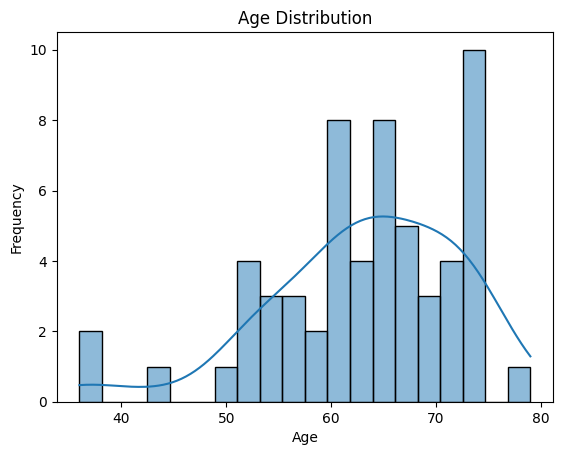

In [ ]:
sns.histplot(data=merged_data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**(II) Scatter Plot: Age vs. Survival Time**

The plot shows the relationship between variables from the dataset.
'Age' is represented on the x-axis and 'Survival time (months) is represented on the y-axis.
The plot indicates that the age is a significant factor in survival time, but it cannot be the only determining factor.

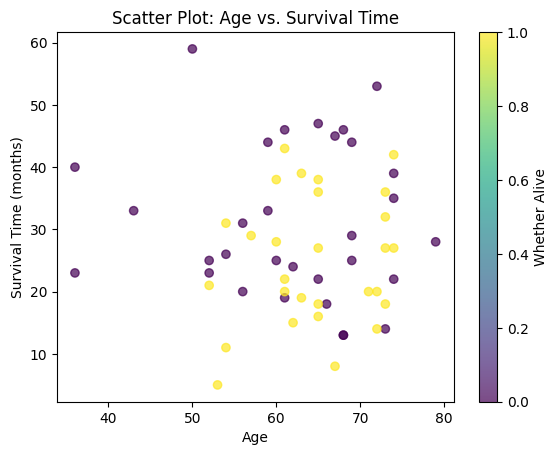

In [ ]:
plt.scatter(merged_data['Age'], merged_data['Survival time（month）'], c=merged_data['Whether alive'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Survival Time (months)')
plt.title('Scatter Plot: Age vs. Survival Time')
plt.colorbar(label='Whether Alive')
plt.show()

**(III) Box Plot: Comparison of TNM Stages**

The plot shows the distribution of age across different TNM stages.
TNM stage is a cancer staging system that considers the size and spread of the tumor, lymph node involvement, and distant metastases.
The plot suggests that patients with more advanced stages tend to be older, but there is a variability in age within each stage.

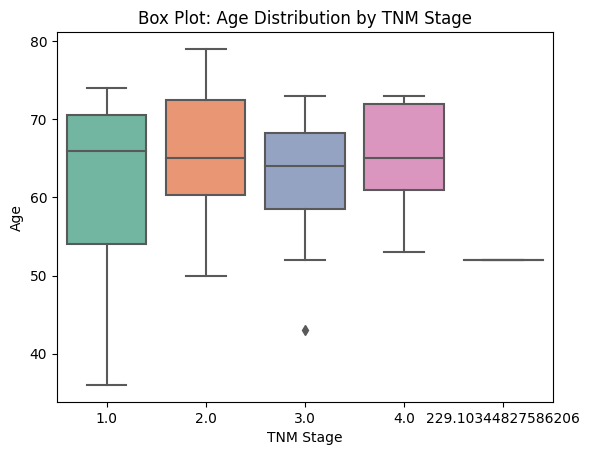

In [ ]:
sns.boxplot(x='TNM', y='Age', data=merged_data, palette='Set2')
plt.xlabel('TNM Stage')
plt.ylabel('Age')
plt.title('Box Plot: Age Distribution by TNM Stage')
plt.show()

**(IV) Bar Chart** of Distribution of Tumor sizes across pathogenic sites

The bar chart visualizes the frequency of tumor sizes at different pathogenic sites.

* The x-axis represents different pathogenic sites, represented as numbers:
1. Cardia
2. Lesser curvature
3. Greater curvature
4. Pylorus
* The y-axis represents the count of cases observed for each category.
* The two different colors in the graph represents the tumor sizes, with blue color for tumors smaller than 3 centimeters and green color for tumors larger than 3 centimeters.

The plot indicates that the lesser curvature which is labeled as "2.0" has the highest count of tumors that are smaller than 3cms as well as highest count of tumors that are larger than 3cms.

The greater curvature ("3.0") has the fewer small tumors(<3cms) compared to other sites.


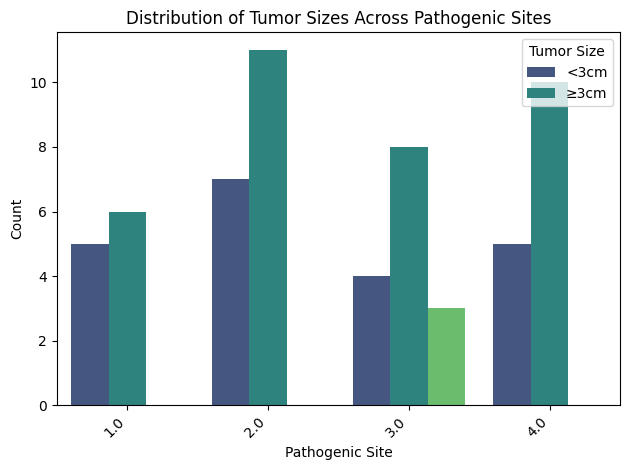

In [ ]:
sns.countplot(data=merged_data, x='Pathogenic site（1：cardia ，2：lesser curvature，3：greater curvature\n，4：pylorus）',
              hue='Tumor size（1：＜3cm，2：≥3cm）', palette='viridis')
plt.title('Distribution of Tumor Sizes Across Pathogenic Sites')
plt.xlabel('Pathogenic Site')
plt.ylabel('Count')
plt.legend(title='Tumor Size', labels=['<3cm', '≥3cm'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**(V) Kaplan-Meier Survival Curve**

This is a survival analysis graph, leveraging kernal density estimation to visualize and compare the distribution of survival times for those still alive versus deceased.
* The x-axis shows the survival time in months.
* The y-axis shows the density of observations.
* The curve labeled "0.0" represents the density of survival times for individuals who did not survive (deceased).
* The curve labeled "1.0" represents the density of survival times for individuals who are still alive.

The plot provides an insight into mortality rates over time and key differences in survival trajecterories between the two groups.

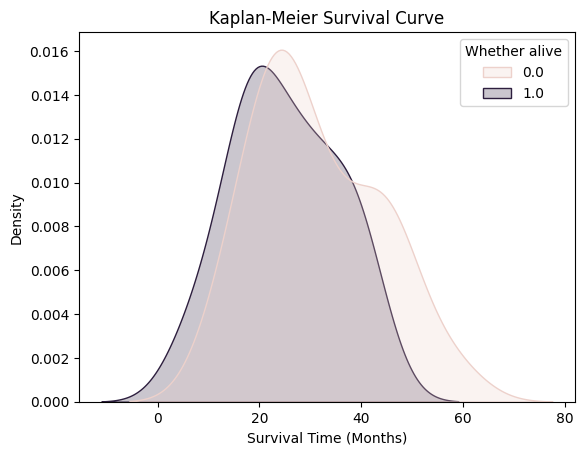

In [ ]:
sns.kdeplot(data=merged_data, x='Survival time（month）', hue='Whether alive', fill=True)
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Density')
plt.show()

**(VI) Violin Plot**
* This plot shows the distribution of age across different differentiated degrees in the dataset.
* Differentiated degree is a categorical variable that classifies tumors based on these four categories:
1: high-medium
2: medium-low
3: low-signet-ring
0: others

* Each violin-shaped curve represents the distribution of age for one differentiated degree.
* The widest part of the violin represents interquartile range(IQR), which encompasses the middle 50% of the data.
* The lines that are extending from the violin body represent the remaining 25% of the data.
* The thickness of the violin body reflects the density of data points at different age ranges within each category.

* This plot suggests that there is a relationship between differentiated degree and age in gastric cancer patients.

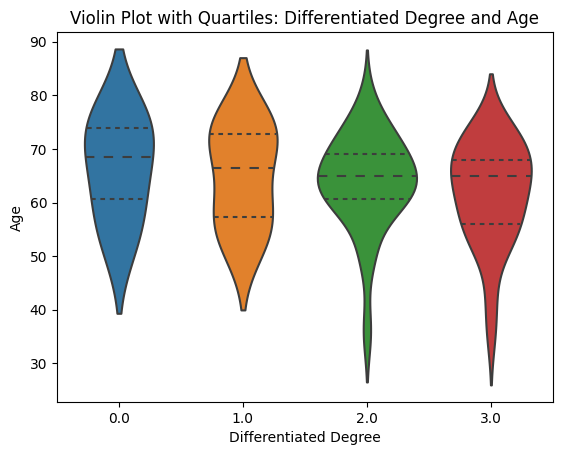

In [ ]:
sns.violinplot(x='Differentiated degree\n（1：high-medium，2：medium-low，3：Low-signet-ring，0：others）',
               y='Age',
               data=merged_data,
               inner='quartile')
plt.xlabel('Differentiated Degree')
plt.ylabel('Age')
plt.title('Violin Plot with Quartiles: Differentiated Degree and Age')
plt.show()

**REGRESSION ANALYSIS**

**(VII) Scatter plot with fitted regression lines**
* The plot shows the relationship between two variables 'Age' and 'Survival time (months)' on x and y axes.
* The data points represent individuals in the dataset.
* Fitted regression line (blue line) represents the linear regression model that best fits the data.
* The plot indicates a negative trend between age and survival time. As age increases, survival time tends to decrease.
* The spread of the data points indicates a significant variability in survival time for individuals of the same age.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


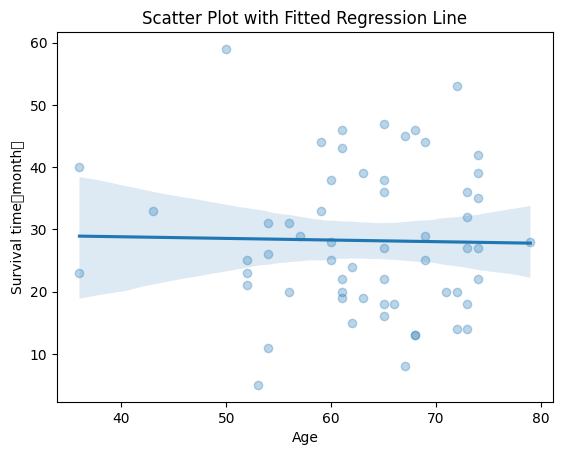

In [ ]:
selected_variables = ['Age', 'Survival time（month）']

# Dropped rows with missing values in the selected variables
subset_df = merged_data[selected_variables].dropna()

# Creating a scatter plot with a fitted regression line
sns.regplot(x='Age', y='Survival time（month）', data=subset_df, scatter_kws={'alpha':0.3})
plt.title('Scatter Plot with Fitted Regression Line')
plt.show()

**CORRELATION ANALYSIS**

**(VIII) Clustermap** showing Correlations of four tumor markers CEA,AFP, Ca125, and Ca19-9. Visualized using hierarchical clustering to identify patterns.

* Spearman's rank correlation measures the monotonic relationship between two variables, and its values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).

* Each square in the grid represents the correlation coefficient between a pair of biomarkers.

* The color of the square encodes the strength and direction of the correlation.
**RED**: Positive correlation (values closer to +1)

**BLUE**: Negative correlation(Values closer to -1)

**WHITE**: No correlation (values close to 0)
* The intensity of the color indicates the strength of the correlation. Darker color represents stronger correlations, either positive or negative.
* Black lines and dendrograms on the sides and top of the grid show the clustering of biomarkers based on their correlations.



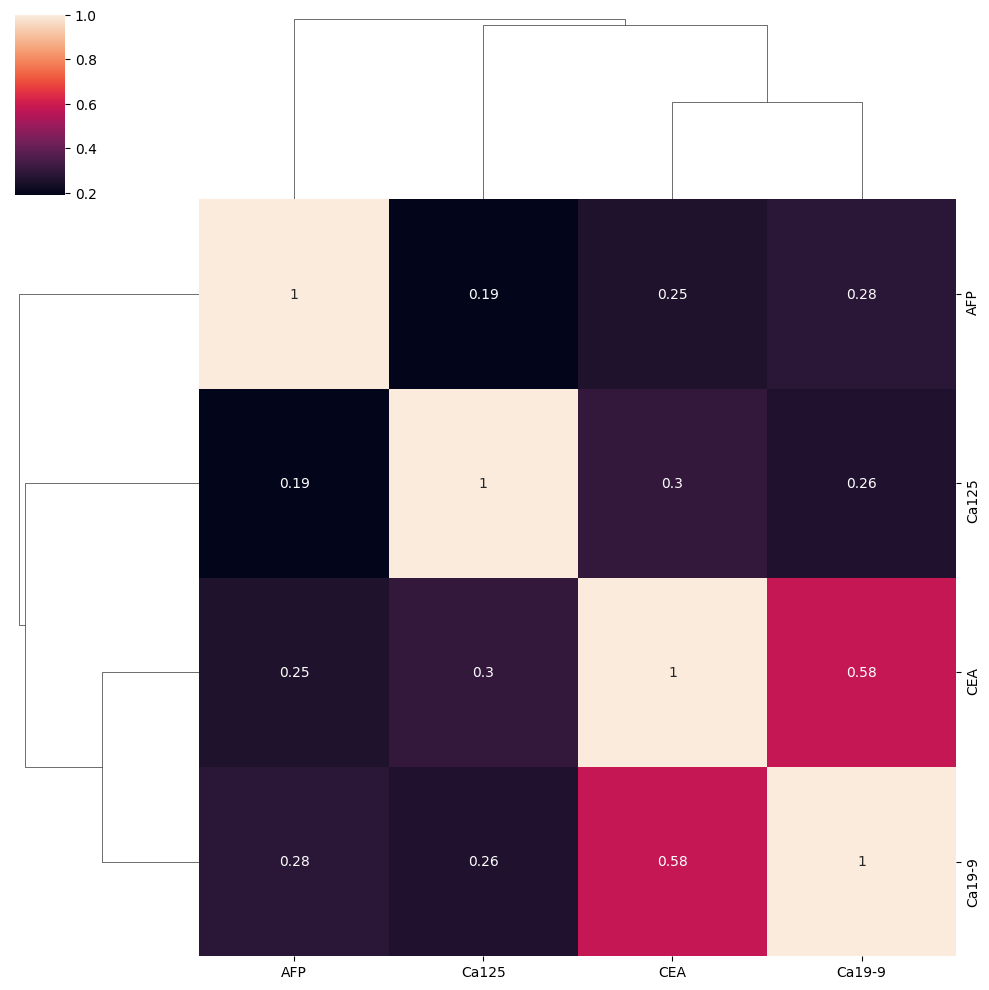

In [ ]:
corr_mat = merged_data[['CEA', 'AFP', 'Ca125', 'Ca19-9']].corr(method='spearman')
sns.clustermap(corr_mat, annot=True)

* The above cluster map has two main observations.
* **Cluster 1: CEA and Ca19-9.**
These markers have a strong positive correlation(red), indicating that they tend to increase or decrease together.

* **Cluster 2: AFP and Ca125**.
These markers have a moderate negative correlation(dark), meaning they tend to move in opposite directions.

* CEA and Ca19-9 are closely related, while AFP and Ca125 exhibit a contrasting relationship.

**(IX) Heatmap to find correlation between biochemical markers**

* The heatmap shows the correlation between different biochemical markers in gastric cancer.
* The markers are listed on the leftside of the heatmap, and the colors represent the strength of the correlation between each pair of markers.
* Red color indicate a positive correlation, meaning that the two markers tend to increase or decrease together.
* Blue color indicate a negative correlation, meaning that one marker tends to increase when the other decreases.
* The intensity of the color represents the strength of the correlation, with darker colors indicating a stronger correlation.


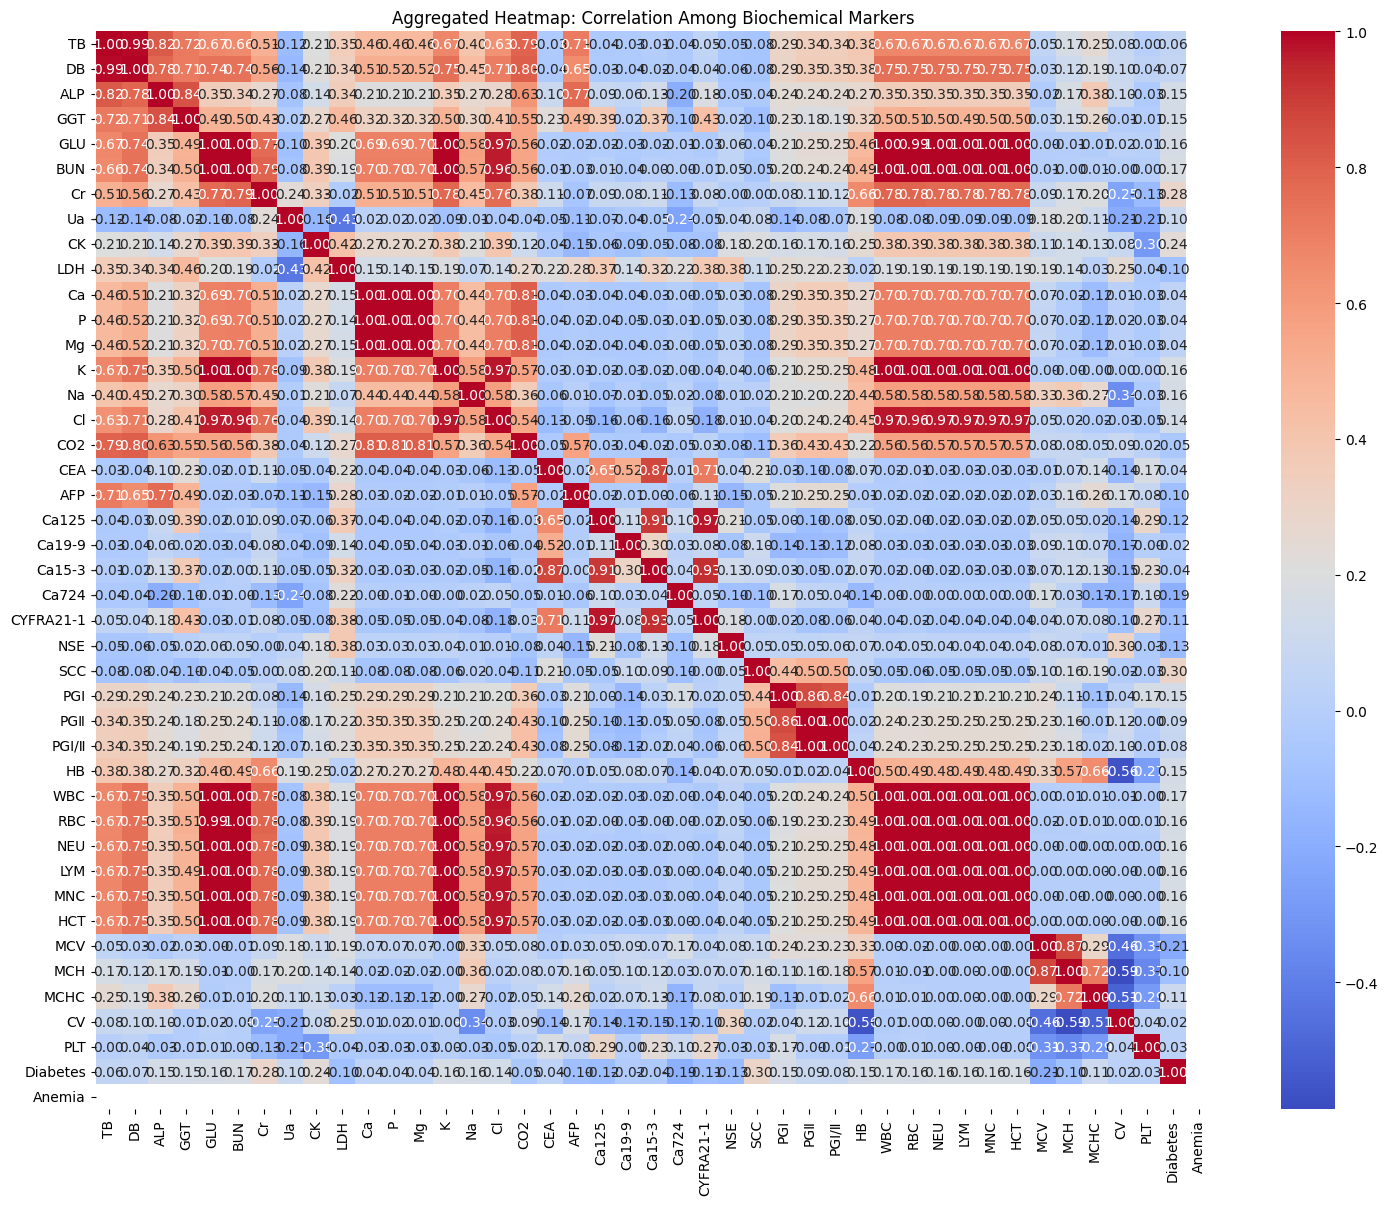

In [ ]:
biochemical_columns = gastric_cancer.iloc[:, 22:67]
correlation_matrix = biochemical_columns.corr()
plt.figure(figsize=(18, 14), dpi=100)
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Aggregated Heatmap: Correlation Among Biochemical Markers')
plt.show()


* There is a strong positive correlation between CEA (Carcinoembryonic antigen) and CA19-9(Carbohydrate antigen 19-9), CA125 (Cancer antigen 125), and CA724 (Cancer antigen 724).

* CEA can be high in gastrointestinal cancers like gastric, colorectal, pancreatic, lung and breast cancers.

* CA19-9 can be high in pancreatic, hepatobiliary, gastric, and colorectal cancers.

* CA125 commonly elevated ovarian cancer marker but can also be high in other cancers like endometrial, fallopian, lung, breast, and gastrointestinal cancers.

* CA724, a gastrointestinal tumor marker that can be high in gastric, esophageal, colorectal, pancreatic, and liver cancers.

* In the context of this gastric cancer dataset, levels o f these biomarkers provide information related to the presence of tumors.

* There is a strong negative correlation between AFP(Alpha-fetoprotein) and CEA, CA19-9, CA125, and CA724. This suggests that AFP may be a useful marker for distinguishing between gastric cancer and other types of cancer.
Elevated AFP in non-pregnancy people usually indicates liver cirrhosis, hepatocellular carcinoma, and testicular cancer.

* There is a moderate positive correlation between HGB(Hemoglobin) and WBC(White Blood Cells), RBC(Red blood cells), NEU(Neutrophils), and LYM(Lymphocytes). This suggests that these markers are invoved in the inflammatory response to cancer.

* There is a moderate negative correlation between MCV(Mean Corpuscular Volume) and MCH(Mean Corpuscular Hemoglobin) . This suggests that these markers may be useful in identifying patients with anemia. Anemia being one of the most common symptoms seen in gastric cancer patients.

Several studies are conducted to find the association between anemia and gastric cancer, suggesting that the presence of preoperative anemia in the gastric cancer patients indicates a poor prognosis.


#**CONCLUSION**
**Gastric cancer** is the 5th most common cancer in terms of incidence and 3rd in cancer-related mortality.
The predominant subtypes of gastric cancer are adenocarcinomas, accounting to nearly 90-95% of all cases.
Research on gastric cancer has significant real world impact in improving patient outcomes.
* **Enables early detection**: Research identifying biomarkers and risk factors helps in the development of screening tests that allow early detection of the condition which improves prognosis and survival rates.
* **Informs personalized medicine**: Understanding molecular subtypes and biological drivers of gastric cancer allows more targeted therapies to be matched to the specific charateristics of each patient's tumor. This results in better response rates.
* **Supports personalized medicine**: research on genetic and genomic gastric cancer data enables treatment regimens that are specifically designed to provide the most effective therapy for each individual patient based on their biological profile.

* **Accelerates new drug development**: Through understanding of underlying biomechanisms, and identification of predictive biomarkers accelerates development of innovative gastric cancer drugs to expand and improve treatment options.

In summary, the continuation of gastric cancer research holds enormous potential for transforming the way we approach this devastating disease. By fostering collaboration across disciplines and driving innovations in basic science, translational medicine, and clinical application, it is possible to generate meaningful progress toward overcoming gastric cancer and improving the lives of those affected by it.

**References:**
1. Harvard Dataverse. (2023). gastric cancer. Harvard Dataverse. https://doi.org/10.7910/DVN/AC79EP.

2. Bermejo, F., & García-López, S. (2009). A guide to diagnosis of iron deficiency and iron deficiency anemia in digestive diseases. World journal of gastroenterology, 15(37), 4638–4643. https://doi.org/10.3748/wjg.15.4638.

3. Tang, G. H., Hart, R., Sholzberg, M., & Brezden-Masley, C. (2018). Iron deficiency anemia in gastric cancer: a Canadian retrospective review. European journal of gastroenterology & hepatology, 30(12), 1497–1501. https://doi.org/10.1097/MEG.0000000000001251.

4. L Beale, A., Penney, M.D. and Allison, M.C. (2005), The prevalence of iron deficiency among patients presenting with colorectal cancer. Colorectal Disease, 7: 398-402. https://doi.org/10.1111/j.1463-1318.2005.00789.x.

5. Necula, L., Matei, L., Dragu, D., Neagu, A. I., Mambet, C., Nedeianu, S., Bleotu, C., Diaconu, C. C., & Chivu-Economescu, M. (2019). Recent advances in gastric cancer early diagnosis. World journal of gastroenterology, 25(17), 2029–2044. https://doi.org/10.3748/wjg.v25.i17.2029.

6. L.-L. Lin, H.-C. Huang, H.-F. Juan.
Discovery of biomarkers for gastric cancer: a proteomics approach. J. Proteome Res., 75 (2012), pp. 3081-3097, 10.1016/j.jprot.2012.03.046.

